## Imports

In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

In [186]:
df = pd.read_csv('data/cleaned.csv')

# Rating Distribution by Country

Most of the data came from Canadian and American customers.

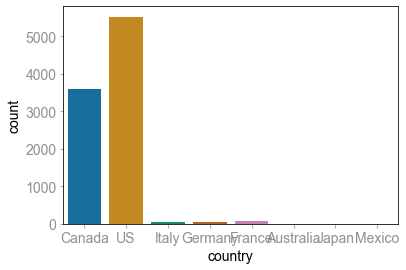

In [232]:
sns.countplot(x='country', data=df, palette='colorblind')
plt.show()

# Rating Distribution by Number of Reviews For Each Country

Canadians live up to their 'nice-guy' stereotype. They tend to give 5-star ratings approximately twice as much as other ratings. Americans, on the other hand, tend to give 5-star ratings less than half as frequently as other ratings.

In [98]:
df.groupby(['country','rating'])['review'].count()

country    rating
Australia  1            1
           5            1
Canada     1          602
           2          484
           3          528
           4          648
           5         1348
France     1           14
           2           15
           3            9
           4           15
           5            9
Germany    1            1
           2           28
           3            2
           4            3
           5            3
Italy      1           11
           2            4
           3            3
           4           12
           5           19
Japan      1            2
           3            4
Mexico     2            1
US         1         1340
           2         1316
           3         1281
           4         1126
           5          464
Name: review, dtype: int64

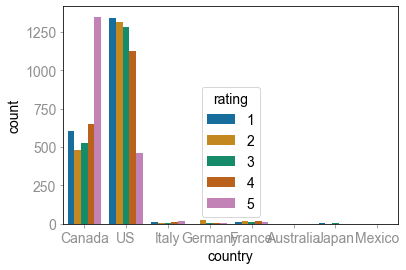

In [231]:
sns.countplot(x='country', hue='rating', data=df, palette='colorblind')
plt.show()

In [120]:
canada_rating = np.array(df[df['country'] == 'Canada'].groupby('rating')['review'].count())
canada_rating_percentage = [x/canada_rating.sum() for x in canada_rating]

[0.1667590027700831,
 0.13407202216066483,
 0.14626038781163436,
 0.17950138504155125,
 0.3734072022160665]

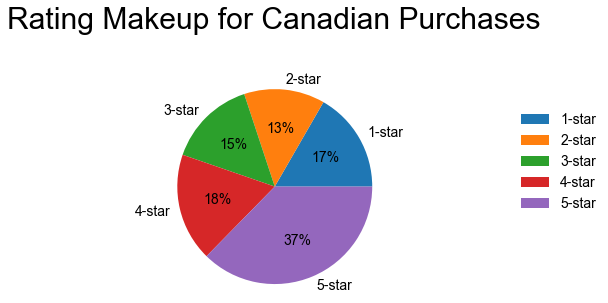

In [159]:
fig, ax = plt.subplots()
# plt.rcParams['font.sans-serif'] = 'Arial'
# plt.rcParams['font.family'] = 'ver'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
# plt.rcParams['xtick.color'] =a '#909090'
# plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=14

ax.pie(canada_rating_percentage, 
       labels=['1-star', '2-star', '3-star', '4-star', '5-star', ], 
       autopct='%1.0f%%'
      )
ax.axis('equal')
ax.set_title("Rating Makeup for Canadian Purchases", y=1.2, fontsize = 30)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.9))

In [147]:
us_rating = np.array(df[df['country'] == 'US'].groupby('rating')['review'].count())
us_rating_percentage = [x/us_rating.sum() for x in us_rating]

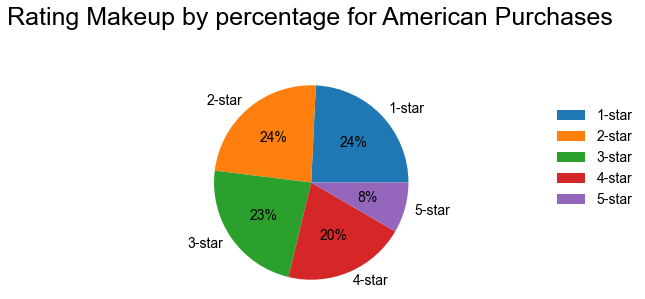

In [228]:
fig, ax = plt.subplots()
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['font.size']=14

ax.pie(us_rating_percentage, 
       labels=['1-star', '2-star', '3-star', '4-star', '5-star', ], 
       autopct='%1.0f%%'
      )
ax.axis('equal')
ax.set_title("Rating Makeup by percentage for American Purchases", y=1.2, fontsize = 25)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.9))

In [211]:
cats = ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb']
df['Month'] = pd.Categorical(df['month'], ordered=True, categories=cats)

## Rating and Review Count Over Time

Of all the reviews I have scraped from Amazon, the number of reviews is consistent between the month of July 2020 and January 2021. This is loosely correlated with covid case numbers and public endorsement of masks.

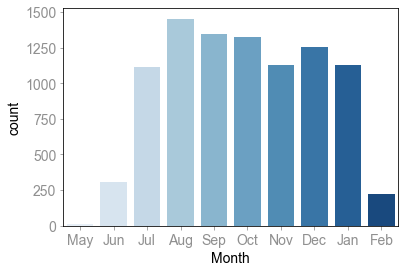

In [236]:
sns.countplot(x='Month', data=df, palette='Blues')
plt.show()

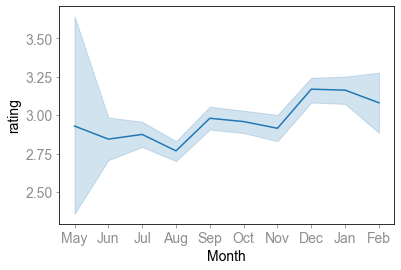

In [225]:
sns.lineplot(x='Month', y='rating', data = df)